In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import cycler
import numpy as np

In [2]:
import matplotlib.dates as mdates

In [3]:
import datetime as dt

read the data, parse the date and put everything on a dataframe

In [4]:
datapath=Path.cwd()/'data'

In [5]:
assert datapath.is_dir()

In [6]:
paths2csvs = [x for x in datapath.glob('covi*.csv')]

In [7]:
stats=[]
for path in paths2csvs:
    
    # names of the form covi{day}{month}
    date=path.stem[4:]+'2020'
    
    daystats=pd.read_csv(path)
    daystats['date']=date
    stats.append(daystats)

In [8]:
stats_df = pd.concat(stats)

In [9]:
stats_df

,ID,CCAA,Casos,IA,UCI,Fallecidos,date,Hospitalizados,Nuevos,Curados
0,935,Andalucía,12,0.14,1,0,05032020,NaN,NaN,NaN
1,936,Aragón,1,0.08,1,0,05032020,NaN,NaN,NaN
2,951,Asturias,5,0.49,2,0,05032020,NaN,NaN,NaN
3,947,Baleares,6,0.52,0,0,05032020,NaN,NaN,NaN
4,948,Canarias,8,0.37,0,0,05032020,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13,942,Madrid,27509,339.74,1514,3603,31032020,15140.0,3419.0,9330.0
14,952,Murcia,974,58.71,59,34,31032020,283.0,35.0,20.0
15,943,Navarra,2305,304.49,99,113,31032020,1035.0,159.0,192.0
16,950,País Vasco,6320,251.61,307,325,31032020,3594.0,263.0,1796.0


In [10]:
# convert to date type
stats_df['date'] = pd.to_datetime(stats_df['date'],format='%d%m%Y')

In [11]:
stats_df.sample()

,ID,CCAA,Casos,IA,UCI,Fallecidos,date,Hospitalizados,Nuevos,Curados
8,940,Cataluña,1866,24.12,33,41,2020-03-18,NaN,NaN,NaN


In [12]:
color_cycler = (plt.cycler(color=(plt.rcParams['axes.prop_cycle'].by_key()['color'])))
ls_cycle = cycler('ls', ['-', '--',':'])
custom_cycle=color_cycler*ls_cycle

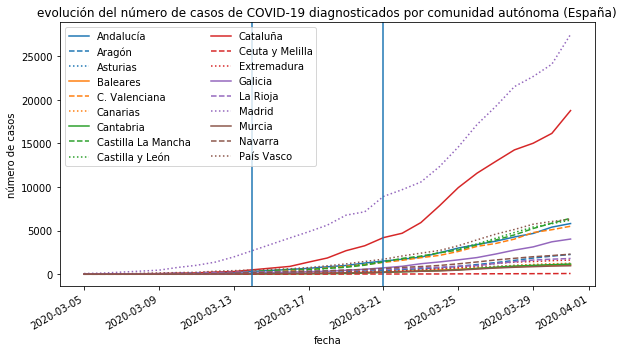

In [13]:
f,a=plt.subplots(figsize=(9,4))
a.set_prop_cycle(custom_cycle)
stats_df.set_index(['date','CCAA'])['Casos'].unstack('CCAA').plot(figsize=(9,5),ax=a);
plt.legend(loc='upper left',ncol=2);
plt.xlabel('fecha')
plt.ylabel('número de casos')
plt.title('evolución del número de casos de COVID-19 diagnosticados por comunidad autónoma (España)');
plt.axvline(pd.Timestamp('2020-03-14'))
plt.axvline(pd.Timestamp('2020-03-21'))
plt.tight_layout()
plt.savefig('n_casos_serietemporal.png',dpi=300)

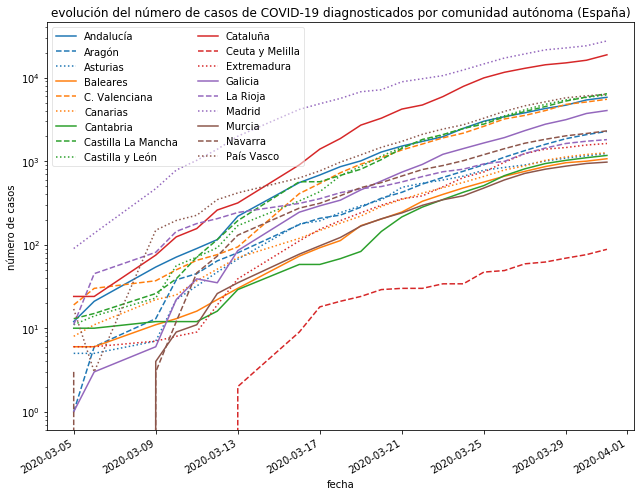

In [14]:
f,a=plt.subplots()
a.set_prop_cycle(custom_cycle)
stats_df.set_index(['date','CCAA'])['Casos'].unstack('CCAA').plot(figsize=(9,7),ax=a);
plt.legend(loc='upper left',ncol=2,framealpha=0.5);
plt.tight_layout()
plt.xlabel('fecha')
plt.ylabel('número de casos')
plt.title('evolución del número de casos de COVID-19 diagnosticados por comunidad autónoma (España)');
plt.yscale('log')
plt.tight_layout()

## Asturias 

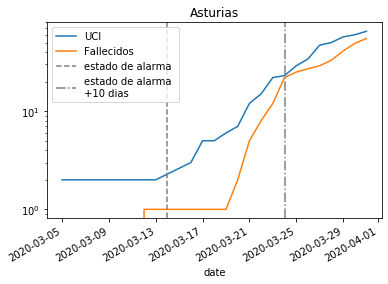

In [15]:
stats_df.loc[stats_df['CCAA']=='Asturias',['UCI','Fallecidos','date']].set_index('date').plot(title='Asturias');
plt.axvline(pd.Timestamp('2020-03-14'),ls='--',c='gray',label='estado de alarma')
plt.axvline(pd.Timestamp('2020-03-24'),ls='-.',c='gray',label='estado de alarma \n+10 dias')
plt.legend()
plt.yscale('log')

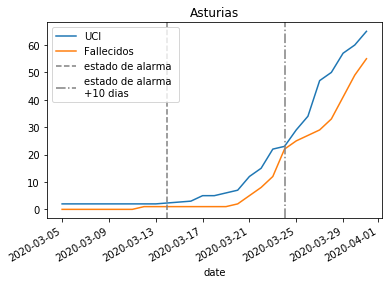

In [19]:
stats_df.loc[stats_df['CCAA']=='Asturias',['UCI','Fallecidos','date']].set_index('date').plot(title='Asturias');
plt.axvline(pd.Timestamp('2020-03-14'),ls='--',c='gray',label='estado de alarma')
plt.axvline(pd.Timestamp('2020-03-24'),ls='-.',c='gray',label='estado de alarma \n+10 dias')
plt.legend();
#plt.yscale('log')

## Cataluña 

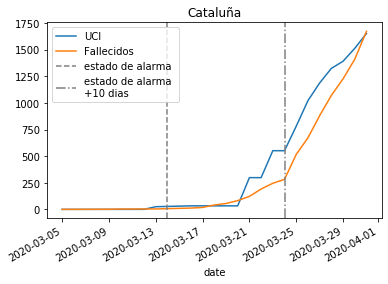

In [17]:
stats_df.loc[stats_df['CCAA']=='Cataluña',['UCI','Fallecidos','date']].set_index('date').plot(title='Cataluña');
plt.axvline(pd.Timestamp('2020-03-14'),ls='--',c='gray',label='estado de alarma')
plt.axvline(pd.Timestamp('2020-03-24'),ls='-.',c='gray',label='estado de alarma \n+10 dias')
plt.legend();
#plt.yscale('log')